<a href="https://colab.research.google.com/github/ll5913/itb/blob/main/IBH_health_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##폰트 설정/데이터 탐색

In [177]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [178]:
'''(1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택 
   - 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)
   - 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능
   - 필요한 경우 데이터 전처리 및 파생변수 생성 
(2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 
   - 적절한 평가 방법 1개 선택 
   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 
(3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등  
(4) 코드는 github에 올리고 주소 제출'''

'(1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택 \n   - 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)\n   - 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능\n   - 필요한 경우 데이터 전처리 및 파생변수 생성 \n(2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 \n   - 적절한 평가 방법 1개 선택 \n   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 \n(3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등  \n(4) 코드는 github에 올리고 주소 제출'

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITB/health_data.csv', encoding='utf-8')
#pd.read_exel('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/MLatoz.xls', encoding = 'euc-kr')
import seaborn as sns           # Seaborn 로딩하기
%matplotlib inline
import matplotlib as mpl        # 기본 설정
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm


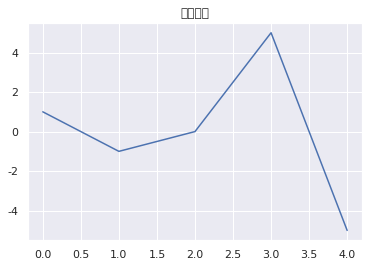

In [181]:
import pandas as pd
import seaborn as sns

# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# "Malgun Gothic"
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 한글폰트 설정 확인을 합니다.

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

In [182]:

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  


In [183]:
mpl.rcParams['axes.unicode_minus'] = False 

!apt-get update -qq
!apt-get install fonts-nanum* -qq       

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)  

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")


sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/Libera

In [184]:
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', family=font_name)

NanumGothic Eco


In [185]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size']=23

In [186]:
import seaborn as sns   

In [187]:
pd.set_option('display.max_columns', None)

In [188]:
data.head(8)

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,1,1,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN,12/29/2021
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,1,2,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,1,1,131.0,79.0,93.0,NaN,NaN,NaN,NaN,15.9,1.0,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0,12/29/2021


##변수 생성

###공복혈당
(1) 공복상태 혈당 검사 (fasting glucose)
[정상치] 70~99 ㎎/ℓ 8시간 이상 공복 후 측정한 혈당이 126 mg/dL 이상인 경우 당뇨병으로 진단이 됩니다. 당뇨병의 증상이 없다면 한번 더 측정한 후 두 번의 결과를 보고 판정을 내리는 것이 정확합니다. 공복혈당이 100-125 mg/dl 사이로 나온다면 이것도 정상이 아니고 공복혈당장애(impaired fasting glucose)로 분류합니다. 이는 당뇨병 전단계 또는 당뇨병이 생길 위험도가 높은 상태인데 그 위험도는 공복혈당장애가 있는 사람이 1년이 지나면 약 10%에서 당뇨병이 생긴다고 합니다.

In [189]:
df=data
df['당뇨'] = 0

df.loc[df['식전혈당(공복혈당)'] >= 126, '당뇨'] = 1
df.loc[df['식전혈당(공복혈당)'] < 126, '당뇨'] = 0
df.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,당뇨
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,0
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,0
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,1
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,0


###BMI
BMI를 이용한 비만도 계산은 자신의 몸무게를 키의 제곱으로 나누는 것으로 공식은 kg/㎡. BMI가 18.5 이하면 저체중 ／ 18.5 ~ 22.9 사이면 정상 ／ 23.0 ~ 24.9 사이면 과체중 ／ 25.0 이상부터는 비만으로 판정

In [190]:
df['BMI'] = df['체중(5Kg 단위)'] / ( df['신장(5Cm단위)'] * df['신장(5Cm단위)'] * 0.0001)
df['BMI']

0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Name: BMI, Length: 10000, dtype: float64

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

##결측치 처리

In [192]:
print(df.isnull().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
당뇨                0
BMI               0
dtype: int64


In [193]:
df = data.dropna(subset = ['음주여부'], axis=0)
df = data.dropna(subset = ['흡연상태'], axis=0)
#3개 행 삭제

In [194]:
df = df.drop(['총콜레스테롤', '트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤'],axis=1)
#5000개 이상의 na 존재하는 열 삭제

###원핫인코딩

In [195]:
X1=df[['성별코드','흡연상태','음주여부']]

X1_dum = pd.get_dummies(X1)
X1_dum.head()
X2=df.loc[: : ,'연령대코드(5세단위)':'감마지티피']
#X3=df[['치아우식증유무', '치석']] 5000개 이상의 na값
y=df[['당뇨']]
y.head()

df = pd.concat([X1_dum, X2, y], axis=1)
df.head()


,성별코드_F,성별코드_M,흡연상태_No,흡연상태_NotNow,흡연상태_Yes,음주여부_No,음주여부_Yes,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,당뇨
0,0,1,1,0,0,1,0,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,0
1,1,0,1,0,0,1,0,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,12.7,1.0,0.5,18.0,15.0,15.0,0
2,1,0,1,0,0,1,0,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,12.8,1.0,0.7,27.0,25.0,7.0,0
3,0,1,1,0,0,1,0,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,16.4,1.0,1.2,65.0,97.0,72.0,1
4,1,0,1,0,0,1,0,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,12.4,1.0,0.7,18.0,17.0,14.0,0


In [196]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "mean")
df = pd.DataFrame(imputer.fit_transform(df))
print("\n평균으로 보간:", df.shape)  
df.head()


평균으로 보간: (9998, 25)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,9.0,165.0,60.0,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,150.0,65.0,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,12.7,1.0,0.5,18.0,15.0,15.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,155.0,55.0,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,12.8,1.0,0.7,27.0,25.0,7.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,13.0,160.0,70.0,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,16.4,1.0,1.2,65.0,97.0,72.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,155.0,50.0,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,12.4,1.0,0.7,18.0,17.0,14.0,0.0


In [197]:
df.columns = ['성별코드_F',	'성별코드_M',	'흡연상태_No',	'흡연상태_NotNow',	'흡연상태_Yes', '음주여부_No',	'음주여부_Yes',	'연령대코드(5세단위)',	'신장(5Cm단위)',	'체중(5Kg 단위)',	'허리둘레',	'시력(좌)',	'시력(우)',	'청력(좌)',	'청력(우)',	'수축기혈압',	'이완기혈압',	'공복혈당',	'혈색소',	'요단백',	'혈청크레아티닌',	'(혈청지오티)AST',	'(혈청지오티)ALT'	,'감마지티피',	'당뇨']
df.head()

,성별코드_F,성별코드_M,흡연상태_No,흡연상태_NotNow,흡연상태_Yes,음주여부_No,음주여부_Yes,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,공복혈당,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,당뇨
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,9.0,165.0,60.0,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,150.0,65.0,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,12.7,1.0,0.5,18.0,15.0,15.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,155.0,55.0,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,12.8,1.0,0.7,27.0,25.0,7.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,13.0,160.0,70.0,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,16.4,1.0,1.2,65.0,97.0,72.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,155.0,50.0,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,12.4,1.0,0.7,18.0,17.0,14.0,0.0


##data set 분류

In [198]:
X = df.loc[: , '성별코드_F':'감마지티피']
X.head()

,성별코드_F,성별코드_M,흡연상태_No,흡연상태_NotNow,흡연상태_Yes,음주여부_No,음주여부_Yes,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,공복혈당,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,9.0,165.0,60.0,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,15.0,1.0,1.1,21.0,27.0,21.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,150.0,65.0,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,12.7,1.0,0.5,18.0,15.0,15.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,155.0,55.0,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,12.8,1.0,0.7,27.0,25.0,7.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,13.0,160.0,70.0,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,16.4,1.0,1.2,65.0,97.0,72.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,155.0,50.0,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,12.4,1.0,0.7,18.0,17.0,14.0


In [199]:
y=df[['당뇨']]

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7498, 24) (2500, 24) (7498, 1) (2500, 1)


In [201]:
!pip install mglearn 
!pip install --upgrade joblib==1.1.0
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##의사결정나무

In [202]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))


학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 1.000


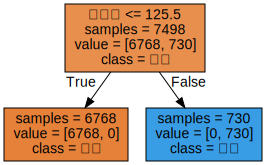

In [203]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "정상", "당뇨"],
                feature_names=df.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))
#과하게 간단한 모델로, tree2 모델을 만들도록 함.

In [204]:
tree2 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, splitter='random', random_state=0)
tree2.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree2.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree2.score(X_test, y_test)))

학습용 데이터 정확도: 0.962
시험용 데이터 정확도: 0.961


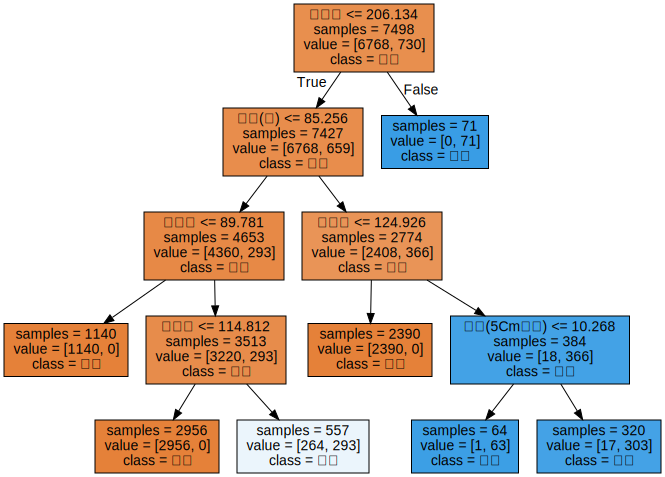

In [205]:
export_graphviz(tree2, out_file="tree2.dot", class_names=[ "정상", "당뇨"],
                feature_names=df.columns[1:], impurity=False, filled=True)

with open("tree2.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

###주요 변수

In [240]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)
#혈색소로 설명 가능

result = tree2.feature_importances_
print("변수의 중요도:\n", result)
#혈색소가 여전히 1에 가까우며 신장의 중요도가 오름.
#당화혈색소 검사는 공복 여부와 상관없이 검사할 수 있다. 당화혈색소 4~5.6%이면 정상이다. 5.7~6.4%인 경우 당뇨병전단계, 6.5% 이상인 경우 당뇨병을 의심할 수 있으므로 높은 중요도를 갖게 된 것으로 보인다.

변수의 중요도:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
변수의 중요도:
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.49113095e-04
 0.00000000e+00 0.00000000e+00 1.64358580e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.83415029e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


###그리드서치

In [206]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
grid_gbrt.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",1.0,1,1.0,1.0,1.0
1,"{'learning_rate': 0.1, 'max_depth': 2}",1.0,1,1.0,1.0,1.0
2,"{'learning_rate': 0.1, 'max_depth': 3}",1.0,1,1.0,1.0,1.0
3,"{'learning_rate': 0.08, 'max_depth': 1}",1.0,1,1.0,1.0,1.0
4,"{'learning_rate': 0.08, 'max_depth': 2}",1.0,1,1.0,1.0,1.0
5,"{'learning_rate': 0.08, 'max_depth': 3}",1.0,1,1.0,1.0,1.0
6,"{'learning_rate': 0.06, 'max_depth': 1}",1.0,1,1.0,1.0,1.0
7,"{'learning_rate': 0.06, 'max_depth': 2}",1.0,1,1.0,1.0,1.0
8,"{'learning_rate': 0.06, 'max_depth': 3}",1.0,1,1.0,1.0,1.0
9,"{'learning_rate': 0.04, 'max_depth': 1}",1.0,1,1.0,1.0,1.0


In [207]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 1.000


In [208]:
tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 1.000


In [209]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 1.000


##knn

In [210]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier

In [211]:
param_distribs = {'n_neighbors': randint(low=1, high=25)}

In [212]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score=True)

In [213]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9c6e17a850>},
                   return_train_score=True)

In [214]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 5}


In [215]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Cross-validity Score: 0.983
Test set Score: 0.980


In [216]:
result_random = random_search.cv_results_

In [217]:
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005638,0.002783,0.291291,0.126729,15,{'n_neighbors': 15},0.981333,0.978667,0.972000,0.975984,0.978652,0.977327,0.003155,5,0.982327,0.980660,0.981494,0.980330,0.981330,0.981228,0.000695
1,0.010484,0.003920,0.369479,0.021784,13,{'n_neighbors': 13},0.982667,0.978667,0.974000,0.976651,0.979320,0.978261,0.002879,2,0.982994,0.982994,0.981994,0.981997,0.983164,0.982629,0.000521
2,0.008803,0.005653,0.481693,0.109717,13,{'n_neighbors': 13},0.982667,0.978667,0.974000,0.976651,0.979320,0.978261,0.002879,2,0.982994,0.982994,0.981994,0.981997,0.983164,0.982629,0.000521
3,0.005039,0.000872,0.294508,0.068815,4,{'n_neighbors': 4},0.978667,0.978000,0.974000,0.978652,0.977318,0.977327,0.001736,4,0.986495,0.985162,0.984995,0.984331,0.986164,0.985429,0.000793
4,0.003847,0.000254,0.223308,0.016125,5,{'n_neighbors': 5},0.982667,0.982667,0.981333,0.986658,0.981321,0.982929,0.001958,1,0.989997,0.988996,0.989163,0.987831,0.990165,0.989230,0.000834
5,0.004953,0.000764,0.228095,0.010574,12,{'n_neighbors': 12},0.980000,0.978000,0.970000,0.976651,0.978652,0.976661,0.003501,6,0.980994,0.980493,0.980160,0.979830,0.980163,0.980328,0.000393
6,0.004916,0.001157,0.230488,0.019261,16,{'n_neighbors': 16},0.977333,0.974667,0.968667,0.973316,0.977318,0.974260,0.003198,9,0.978493,0.976826,0.977326,0.977163,0.977330,0.977427,0.000563
7,0.004774,0.000717,0.256111,0.047967,20,{'n_neighbors': 20},0.977333,0.975333,0.967333,0.971981,0.975984,0.973593,0.003592,10,0.976826,0.975325,0.977159,0.975996,0.976329,0.976327,0.000641
8,0.004065,0.000420,0.169364,0.010444,2,{'n_neighbors': 2},0.976000,0.978000,0.970667,0.977318,0.975317,0.975460,0.002577,8,0.986329,0.985662,0.985995,0.986498,0.987498,0.986396,0.000621
9,0.004670,0.001507,0.233348,0.011087,12,{'n_neighbors': 12},0.980000,0.978000,0.970000,0.976651,0.978652,0.976661,0.003501,6,0.980994,0.980493,0.980160,0.979830,0.980163,0.980328,0.000393


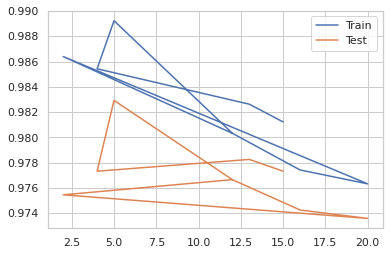

In [218]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

In [219]:
from sklearn.model_selection import GridSearchCV

In [220]:
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15]}
from sklearn.neighbors import KNeighborsClassifier

In [221]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [222]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             return_train_score=True)

In [223]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))
#tree2에 비해 knn7의 스코어가 더 높은 것을 확인함.

Best Parameter: {'n_neighbors': 5}
Best Cross-validity Score: 0.983
Test set Score: 0.980


In [224]:
result_grid= pd.DataFrame(grid_search.cv_results_)

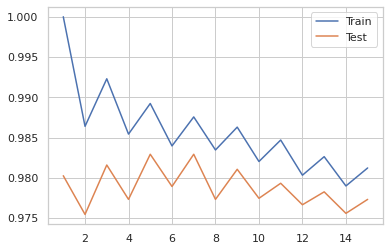

In [225]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

In [226]:
knn=KNeighborsClassifier(n_neighbors=7)

###교차검증

In [227]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [228]:
kfold=KFold(n_splits=5, shuffle=True, random_state=42)

In [229]:
score=cross_val_score(knn, X_train, y_train, cv=kfold)
score.mean()

0.9811945741605514

###모델검증

In [230]:
from sklearn.neighbors import KNeighborsClassifier
knn7=KNeighborsClassifier(n_neighbors=7)

In [231]:
knn7.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

In [232]:
pred_train=knn7.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train) 

In [233]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[6762    6]
 [  83  647]]


In [234]:
pred_test=knn7.predict(X_test)

In [235]:
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[2216    7]
 [  42  235]]


In [236]:
from sklearn.metrics import classification_report
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2223
         1.0       0.97      0.85      0.91       277

    accuracy                           0.98      2500
   macro avg       0.98      0.92      0.95      2500
weighted avg       0.98      0.98      0.98      2500

